# Fetching Laibraries:

In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Loading Data 

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv')
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


Here we load data from github. We see top five rows and columns here.

In [3]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

Here we see all columns name.

In [4]:
df.shape

(30, 17)

Here we see the shape of data. Rows = 30 and Columns = 17

In [5]:
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

Here we see data type. All columns have integer data type except ERA( Earned run average) which has float(decimal) type data.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


Here we are finding null values in side the data. We see there in no any null value present in our data.

# Summary Statistics

In [7]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


Describe method shows us the total count value, mean, standard deviation, minimum value, maximum value, median, 25% and 75% of data of each columns.
Standard deviation shows spread of data.
50% is showing the median of data.
The gap between maximum and 75% is shows us skewness of column. If it is high then that column has skewness else no skewnes is present.

In [8]:
df.W.unique()

array([ 95,  83,  81,  76,  74,  93,  87,  80,  78,  88,  86,  85,  68,
       100,  98,  97,  64,  90,  71,  67,  63,  92,  84,  79], dtype=int64)

Here we find uniqueness in Win column(winning percentage) by using pandas unique function. 

In [9]:
df.W.value_counts()

68     3
83     2
74     2
76     2
81     2
64     1
93     1
92     1
90     1
88     1
87     1
86     1
85     1
84     1
80     1
97     1
100    1
78     1
63     1
79     1
71     1
67     1
98     1
95     1
Name: W, dtype: int64

Here we see how much time a team win with its winning percentage.we see when team get 68% winning chance it wins 3 times, at 83,74,76,81 percent respectivily it wins 2 times and except these it win only 1 time. 

# Data Visualization

# Checking null vallues in data

In [10]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

Here we are finding null values.There are non.

<AxesSubplot:>

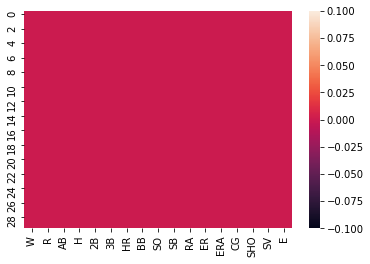

In [11]:
sns.heatmap(df.isnull())

Here we check null values in side the data through seaborn visualization process. Here we find nothing as null.

# Finding Correlation

In [12]:
dfcor = df.corr()
dfcor

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


Here we see correlations between each and every column. Here 1 shows highly correlated value, negative figure shows less correlated and between 1 to 0 shows positive correlated values.

<AxesSubplot:>

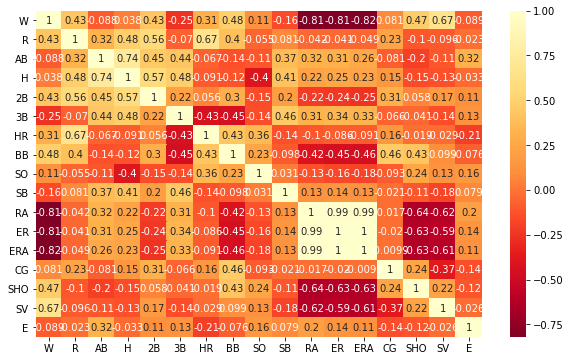

In [13]:
plt.figure(figsize = (10, 6))
sns.heatmap(dfcor, cmap = 'YlOrRd_r', annot = True)

Here above correlated values shown by heatmap graph. Here we see a clear view of correlation with it's value.Here lighter colour shows positive correlation and dark colour shows negative correlation.The daigonal of light colour shows highly correlated value. Column RA,EA and ERA shows highly correlated.Here same columns shows negative correlation with win column and SV, SHO also.

# Plotting Outliers

In [14]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

<AxesSubplot:>

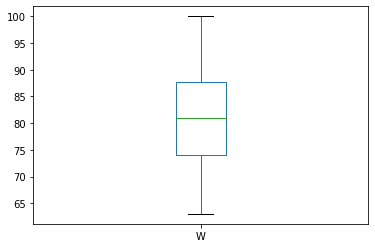

In [15]:
df['W'].plot.box()

In [16]:
df.shape

(30, 17)

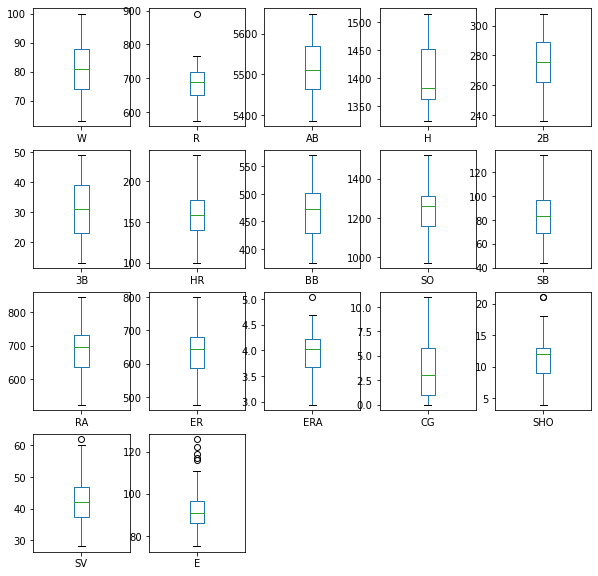

In [17]:
df.plot(kind = 'box', subplots = True, layout = (4,5), figsize = (10,10))
plt.show()

Here we see some outlier in ERA, SHO, SV and E. We have to drop these columns so that they can not affect our data.

# checking skewness

<AxesSubplot:xlabel='W', ylabel='Density'>

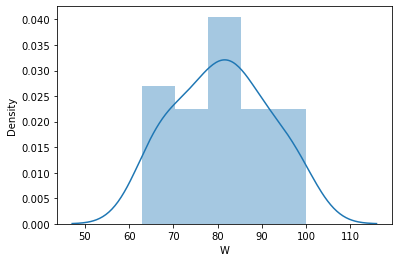

In [18]:
sns.distplot(df['W'])

<AxesSubplot:xlabel='R', ylabel='Density'>

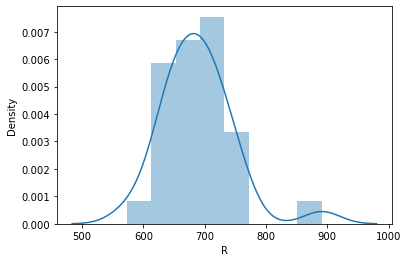

In [19]:
sns.distplot(df['R'])

<AxesSubplot:xlabel='ERA', ylabel='Density'>

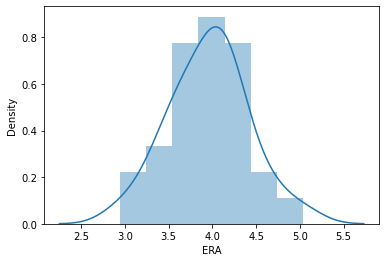

In [20]:
sns.distplot(df['ERA'])

<AxesSubplot:xlabel='SV', ylabel='Density'>

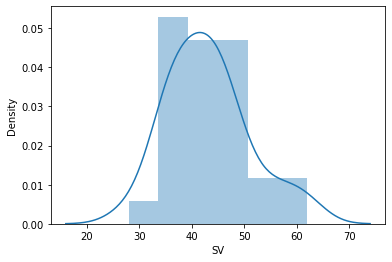

In [21]:
sns.distplot(df['SV'])

<AxesSubplot:xlabel='SHO', ylabel='Density'>

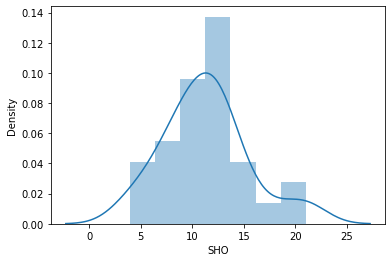

In [22]:
sns.distplot(df['SHO'])

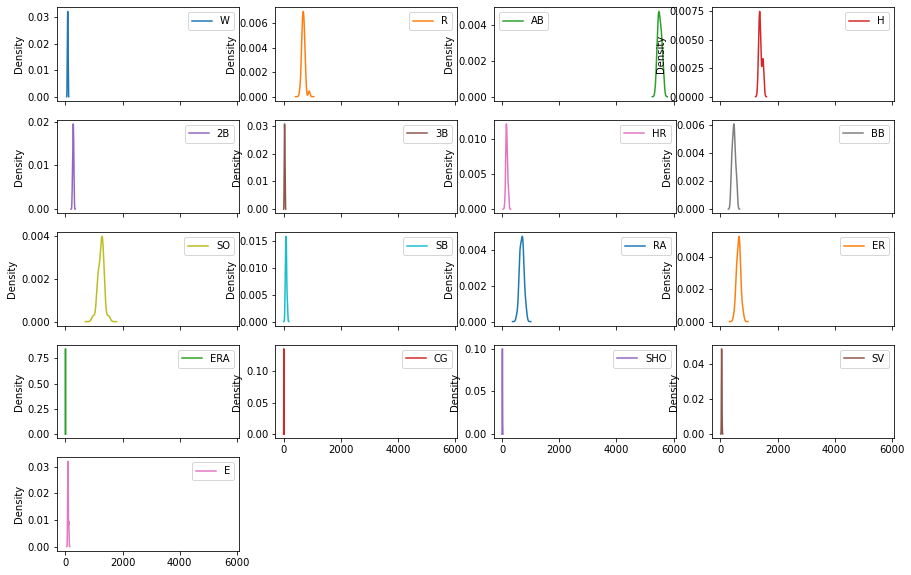

In [23]:
df.plot(kind = 'kde', subplots = True, layout = (5,4), figsize = (15, 10))
plt.show()

Here we check skewness in side each column. We see there is no skewness present in side the data.

In [24]:
df.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

Here we also see there is no skewness in data.

In [25]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

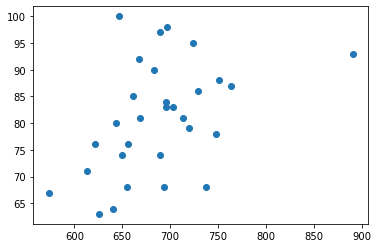

In [26]:
plt.scatter(df['R'], df['W'])
plt.show()

Here we see bivariant relation. It is not showing any relation between them.

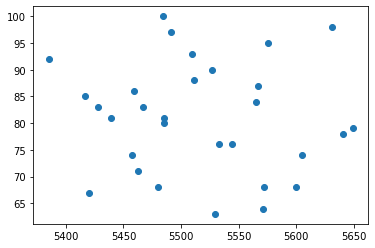

In [27]:
plt.scatter(df['AB'], df['W'])
plt.show()

Here we see there is no relation between AB and W. AtBat is not affecting win column.

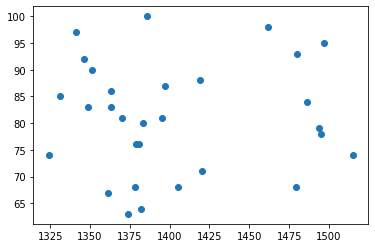

In [28]:
plt.scatter(df['H'], df['W'])
plt.show()

Here we see there is no relation between H and W. Hit is not affecting the Win column.

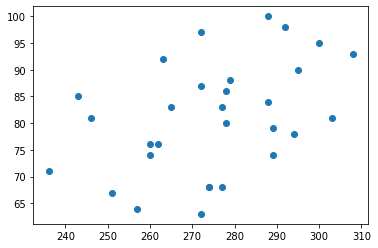

In [29]:
plt.scatter(df['2B'], df['W'])
plt.show()

Here we see there is no relation between 2B and W. 2B(Double) is not affecting win column.

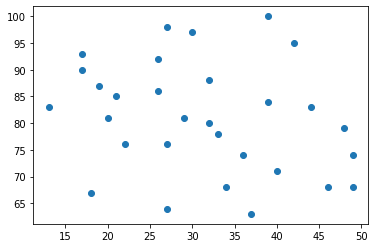

In [30]:
plt.scatter(df['3B'], df['W'])
plt.show()

Here we see there is no relation between 3B and W. 3B(Triple Hit) is not affecting win column.

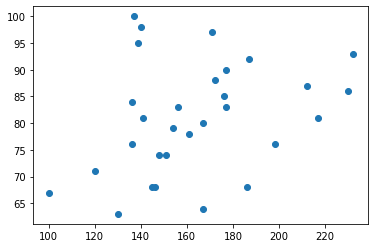

In [31]:
plt.scatter(df['HR'], df['W'])
plt.show()

Here we see there is no relation between HR and W. HR(Home run per hit) is not affecting win column.

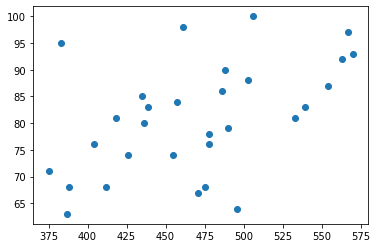

In [32]:
plt.scatter(df['BB'], df['W'])
plt.show()

Here we see some positive relation between BB and win column.

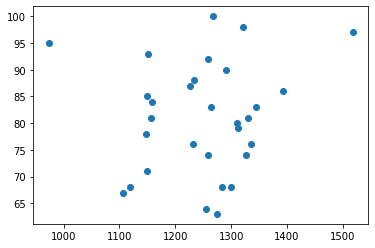

In [33]:
plt.scatter(df['SO'], df['W'])
plt.show()

Here we see some positive relation between SO and win column.

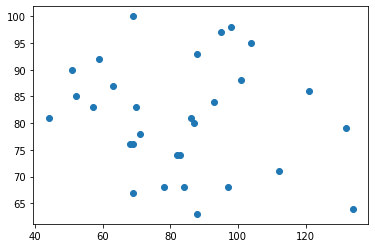

In [34]:
plt.scatter(df['SB'], df['W'])
plt.show()

Here we see there is no relation between SB and W. SB(Stolen base) is not affecting win column.

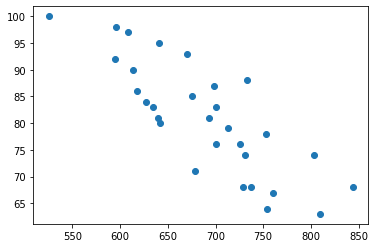

In [35]:
plt.scatter(df['RA'], df['W'])
plt.show()

Here we see there is a negative relation between RA and W. We should drop it in data cleaning process later.

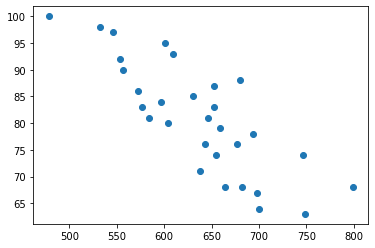

In [36]:
plt.scatter(df['ER'], df['W'])
plt.show()

Here we see negative relation between ER and W. ER(earn run) is affecting win in negative way.If ER increasess then win decreasess and vice-a-versa.So we drop it later in data cleaning process.

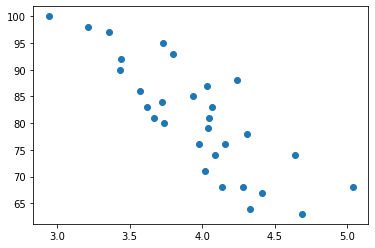

In [37]:
plt.scatter(df['ERA'], df['W'])
plt.show()

Here we see negative relation between ERA and W. ERA(earn run average) is affecting win in negative way.If ERA increasess then win decreasess and vice-a-versa.So we drop it in data cleaning process later.

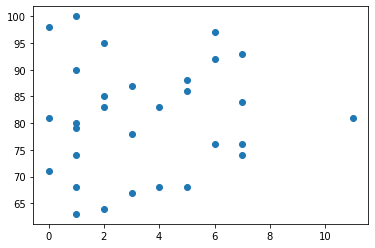

In [38]:
plt.scatter(df['CG'], df['W'])
plt.show()

Here we see there is no relation between CG and W. CG(Complete game) is not affecting win column.

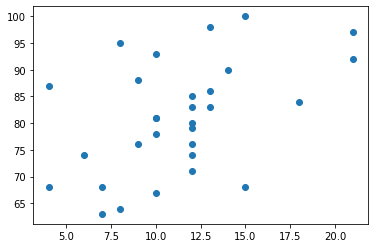

In [39]:
plt.scatter(df['SHO'], df['W'])
plt.show()

Here we see there is no relation between SHO and W. SHO(Shoutout) is not affecting win column.

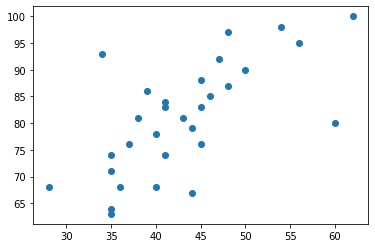

In [40]:
plt.scatter(df['SV'], df['W'])
plt.show()

Here we see some positive relation between SV and W.

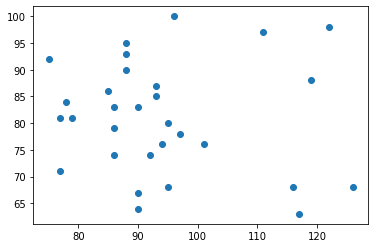

In [41]:
plt.scatter(df['E'], df['W'])
plt.show()

Here we see there is no relation between E and W. E is not affecting win column.

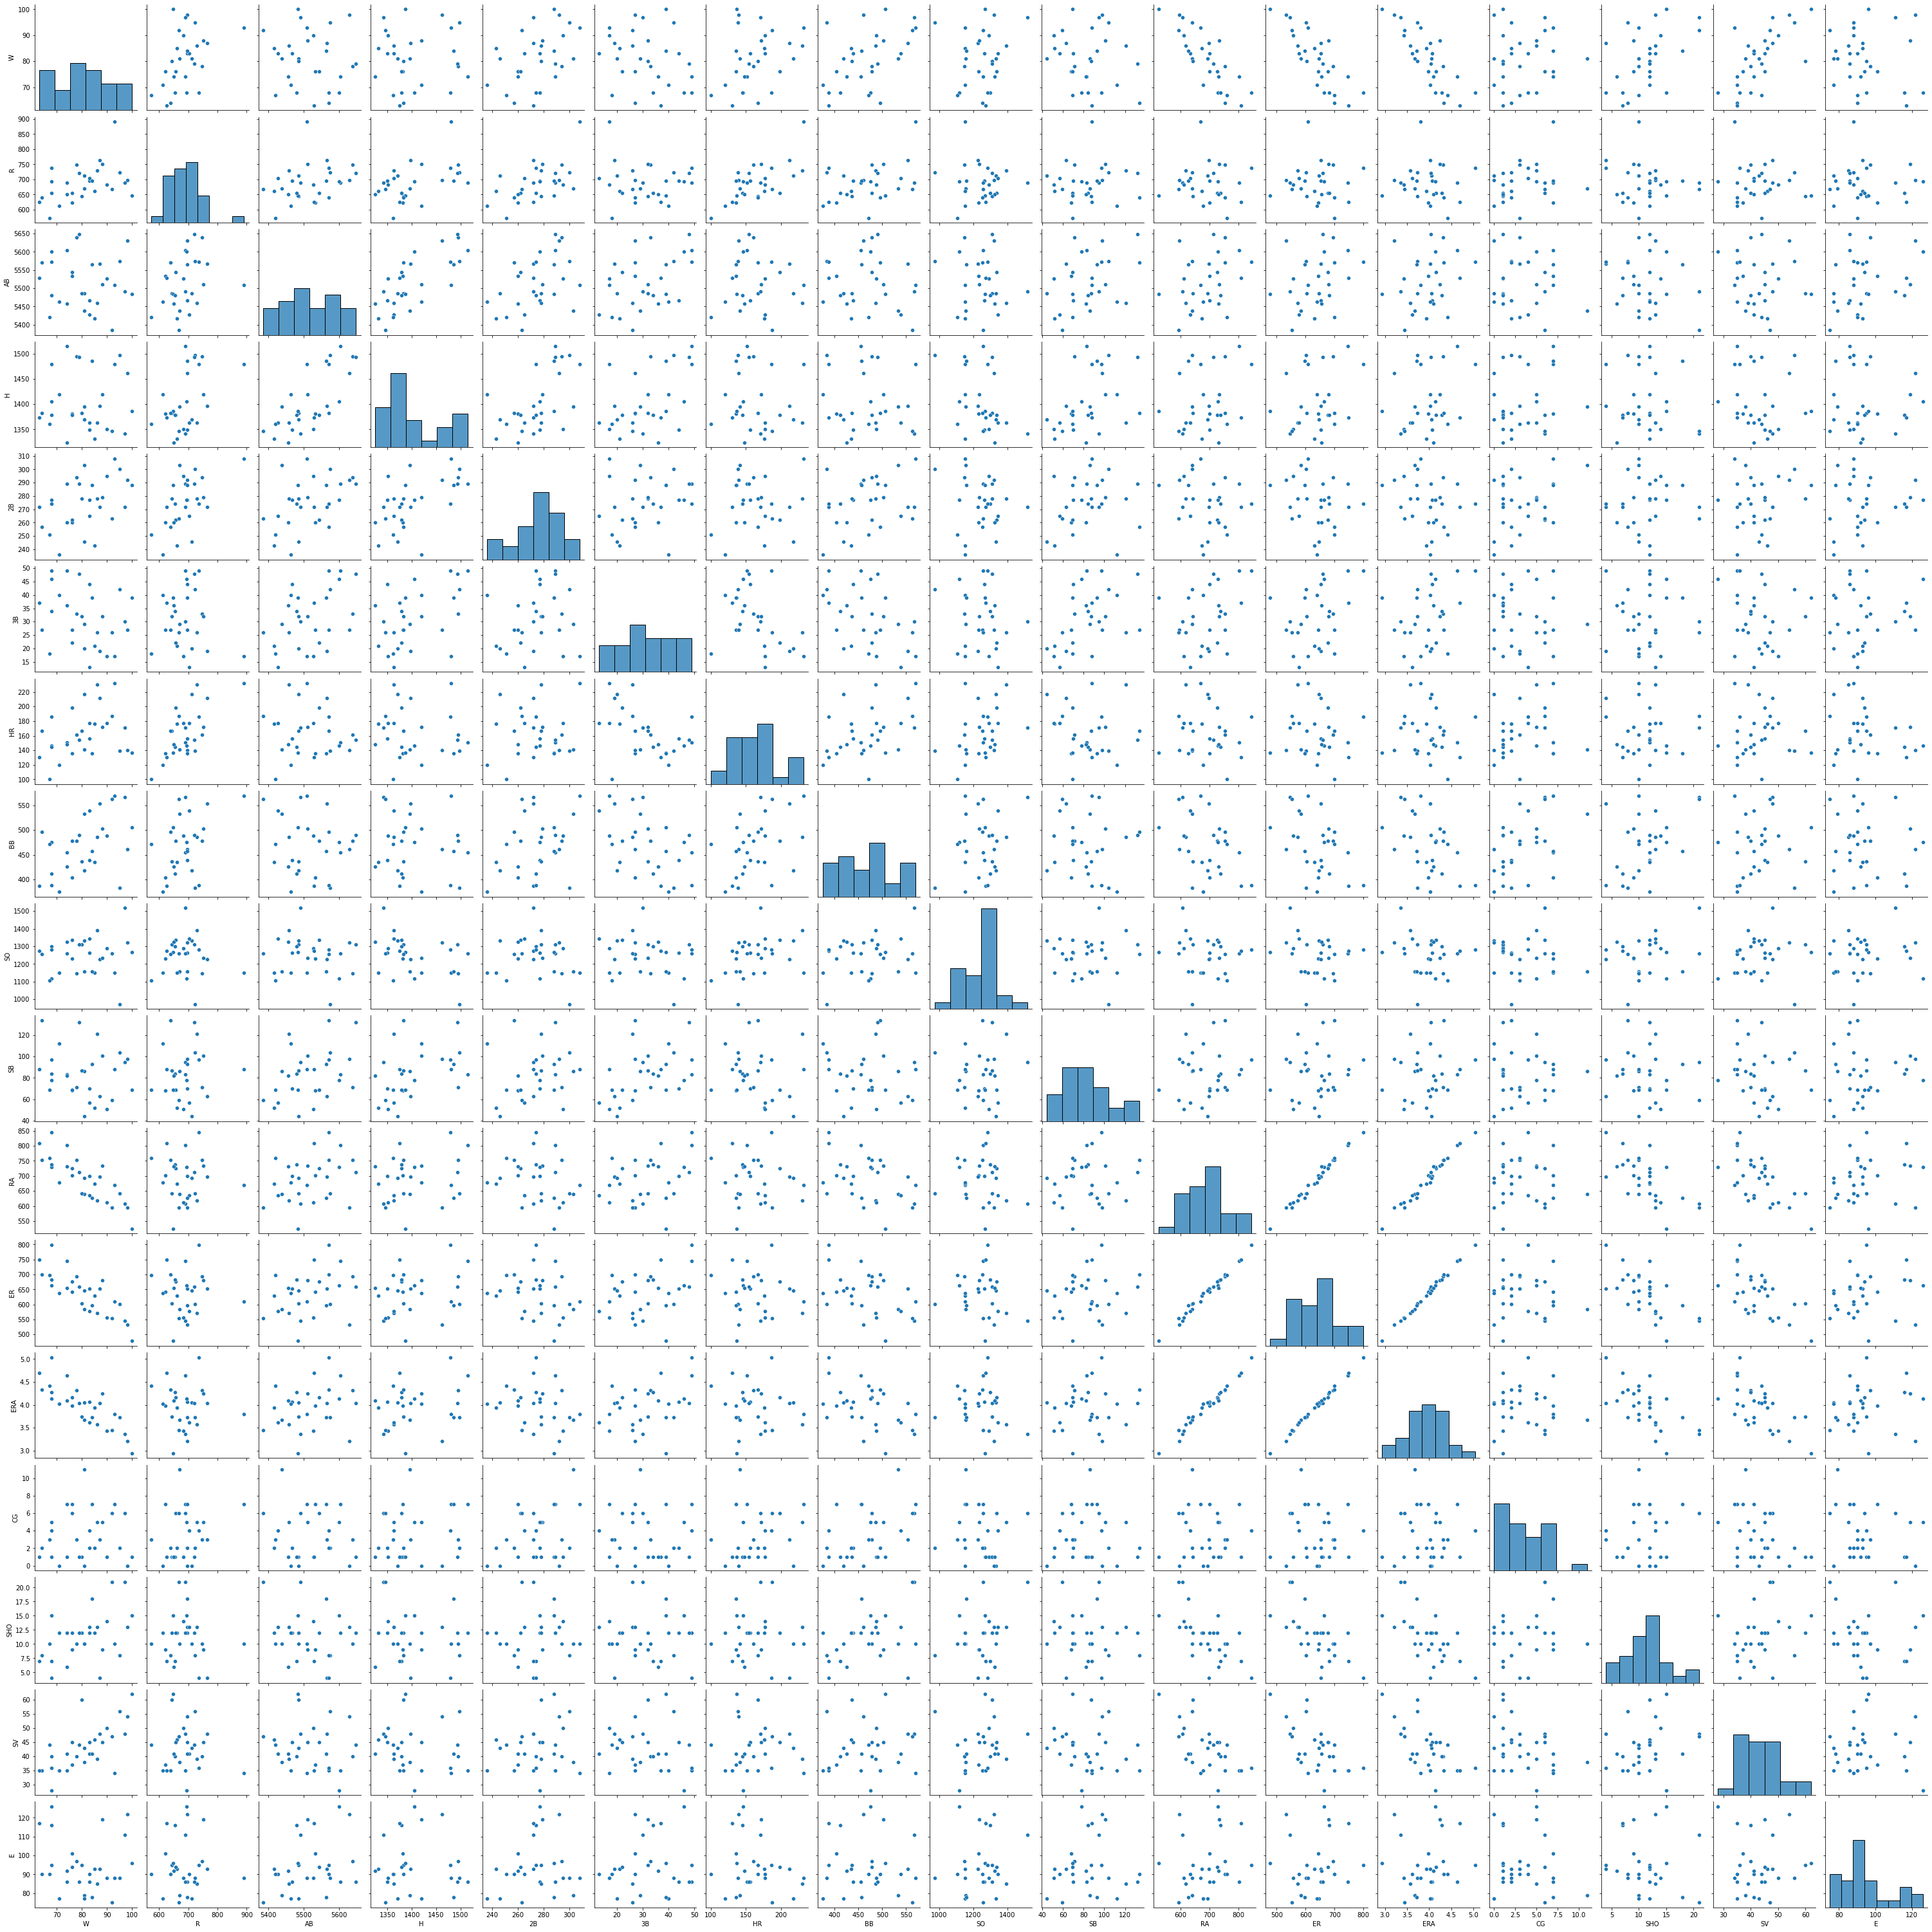

In [42]:
sns.pairplot(df)

Here we show collectively all relation between each and every columns

# Data Cleaning Process

In [43]:
df.drop('RA', axis = 1, inplace = True)

In [44]:
df.drop('ER', axis = 1, inplace = True)

In [45]:
df.drop('ERA', axis = 1, inplace = True)

In [46]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,7,12,35,86


Here we see all three columns removed from our data.

In [47]:
df.shape

(30, 14)

# Removing Outliers

In [48]:
from scipy.stats import zscore
z = np.abs(zscore(df))
z

array([[1.36540860e+00, 6.19077968e-01, 8.47731264e-01, 1.66368512e+00,
        1.42017307e+00, 1.04119304e+00, 7.87298598e-01, 1.53490242e+00,
        2.69762957e+00, 9.13883291e-01, 5.39806195e-01, 8.14628593e-01,
        1.67160651e+00, 4.61469635e-01],
       [1.97838300e-01, 1.34431656e-01, 7.11093535e-01, 9.70680764e-01,
        1.27403389e-01, 1.23580856e+00, 2.43966683e-01, 5.36591904e-01,
        1.54878442e-01, 6.01825582e-01, 5.39806195e-01, 1.72800005e-01,
        2.49879323e-01, 6.07196888e-01],
       [3.24325082e-03, 3.32905860e-01, 1.11523330e+00, 1.51891367e-01,
        1.58879521e+00, 2.23807850e-01, 7.23377196e-01, 1.13914361e+00,
        8.93981893e-01, 1.11449182e-01, 2.77264091e+00, 3.20914294e-01,
        6.54856158e-01, 1.11724227e+00],
       [4.83244373e-01, 1.14641931e+00, 2.41521620e-01, 4.01088140e-01,
        8.28122030e-01, 4.18423371e-01, 8.83180700e-01, 1.16053598e+00,
        1.68601848e-01, 6.90984928e-01, 1.30044220e+00, 5.67771443e-01,
        7.841

Here we import zscore to remove outliers from data

In [49]:
threshold = 3
print(np.where(z>3))

(array([5], dtype=int64), array([1], dtype=int64))


Here we are taking threshold for outliers.

In [50]:
new_df = df[(z<3).all(axis = 1)]
new_df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,7,12,35,86


Here outliers removed.

In [51]:
df.shape

(30, 14)

Here checking old data shape.

In [52]:
new_df.shape

(29, 14)

Here we see outliers has been removed from data and now it has only 29 rows.

# Splitting data into Input and Output variable:

In [53]:
x = new_df.iloc[:,1:]
x.head()

,R,AB,H,2B,3B,HR,BB,SO,SB,CG,SHO,SV,E
0,724,5575,1497,300,42,139,383,973,104,2,8,56,88
1,696,5467,1349,277,44,156,439,1264,70,2,12,45,86
2,669,5439,1395,303,29,141,533,1157,86,11,10,38,79
3,622,5533,1381,260,27,136,404,1231,68,7,9,37,101
4,689,5605,1515,289,49,151,455,1259,83,7,12,35,86


Here we split data into input variable.

In [54]:
y = new_df.iloc[:,0]
y.head()

0    95
1    83
2    81
3    76
4    74
Name: W, dtype: int64

Here we split target variable.

In [55]:
x.shape

(29, 13)

Here we see the shape of x(independent)variable.

In [56]:
y.shape

(29,)

Here we see the shape of y(dependent)variable.

In [57]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =.20, random_state = 42)

Here we training the model by using train_test_split function.And rendomly it take differet rows to train and test the data.

In [58]:
x_train.shape

(23, 13)

Here we see our model is training 80% of  the data and rest 20% is using for test.

In [60]:
y_train.shape

(23,)

Here we see 80% of target train data.

In [59]:
x_test.shape

(6, 13)

Here we see our model show us 20% of test data.

In [61]:
y_test.shape

(6,)

Here we see 20% of target test data.

# Model Selection - Linear Regression

In [62]:
LR = LinearRegression()

Here we are taking instance of linearregression model.

In [63]:
LR.fit(x_train, y_train)

LinearRegression()

Here using fit method to train data.

In [64]:
LR.coef_

array([ 1.56276897e-01,  1.77002503e-03, -2.54225743e-02, -5.70225367e-02,
       -2.84271069e-01, -1.32231088e-01, -1.85260179e-02, -3.82133340e-04,
        2.31901178e-02,  8.17583787e-01,  8.88231246e-01,  9.44269875e-01,
       -3.19806793e-02])

Here we find coeficient value.

In [65]:
LR.intercept_

2.9067400745592664

Here we find intercept value that means best fit line touch this point on y axis.

In [66]:
LR.score(x_train, y_train)

0.8961568723653599

Here, this score value shows that our model is working approx 89%.

# Prediction of the values:

In [67]:
pred = LR.predict(x_test)
print("Predicted result :", pred)
print("Actual result :", y_test)

Predicted result : [71.27867098 96.01146737 80.08843932 77.25018859 82.69938099 89.52184376]
Actual result : 28    74
17    97
13    76
23    67
9     78
10    88
Name: W, dtype: int64


In [68]:
print('error :')
print('Mean absolute error :', mean_absolute_error(y_test, pred))
print('Mean squared error :', mean_squared_error(y_test, pred))
print('Root Mean Squared Error :', np.sqrt(mean_squared_error(y_test, pred)))

error :
Mean absolute error : 4.044952385288577
Mean squared error : 25.760786794207636
Root Mean Squared Error : 5.07550852567579


Here we see mean error of data.This result find by mean absolute method. We also find difference between absolute error and squared error as root mean squared error.

In [69]:
from sklearn.metrics import r2_score
print(r2_score(y_test, pred))

0.7325869882954225


Here r2 score shows us coeficient value.This r2 score shows the change of target while change of independent variable.

In [70]:
r = np.array([0.00456, 45, 4.9,0.423,87, 34,98, 87,.00876,908,55,321,89])
r.shape

(13,)

In [71]:
r = r.reshape(1, -1)
r.shape

(1, 13)

In [72]:
LR.predict(r)

array([1063.24552739])

In [73]:
df = pd.DataFrame(pred)
df.to_csv('Win_Prediction_Baseball.csv')